**Analyse de donnée :** https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-profits-dataset/ <br>
**Problèmatique :** Horror Movies - the best Hollywood Investments?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format


**Analyse globale de la base de données**

In [3]:
movies = pd.read_csv('data.csv')
print(movies['genre'].value_counts())
print('Il y a', movies.shape[0], 'films dans la base de données.')
movies

genre
Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: count, dtype: int64
Il y a 3401 films dans la base de données.


,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,"175,000,000.00","100,289,690.00","174,131,329.00",Universal,PG,Comedy
1,2,7/28/1995,Waterworld,"175,000,000.00","88,246,220.00","264,246,220.00",Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,"175,000,000.00","39,175,066.00","139,950,708.00",Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,"175,000,000.00","38,362,475.00","151,716,815.00",Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,"170,000,000.00","416,769,345.00","1,304,866,322.00",Universal,PG-13,Action
...,...,...,...,...,...,...,...,...,...
3396,3397,10/28/2011,Like Crazy,"250,000.00","3,395,391.00","3,728,400.00",Paramount Pictures,PG-13,Drama
3397,3398,7/14/2000,Chuck&Buck,"250,000.00","1,055,671.00","1,157,672.00",Artisan,R,Drama
3398,3399,3/28/1997,Love and Other Catastrophes,"250,000.00","212,285.00","743,216.00",Fox Searchlight,R,Comedy
3399,3400,8/28/1998,I Married a Strange Person,"250,000.00","203,134.00","203,134.00",Lionsgate,NaN,Comedy


In [5]:
movies['benefice'] = movies['worldwide_gross'] - movies['production_budget']
data = movies.groupby('genre')[['production_budget', 'worldwide_gross', 'benefice']].mean()
data = data.reset_index()
data.sort_values('benefice')
movies.sort_values('benefice')

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre,benefice
30,31,12/21/2018,Aquaman,"160,000,000.00",0.00,0.00,Warner Bros.,PG-13,Action,"-160,000,000.00"
69,70,3/11/2011,Mars Needs Moms,"150,000,000.00","21,392,758.00","39,549,758.00",Walt Disney,PG,Adventure,"-110,450,242.00"
228,229,3/15/2019,Wonder Park,"100,000,000.00",0.00,0.00,Paramount Pictures,PG,Adventure,"-100,000,000.00"
226,227,8/16/2002,The Adventures of Pluto Nash,"100,000,000.00","4,411,102.00","7,094,995.00",Warner Bros.,PG-13,Comedy,"-92,905,005.00"
281,282,4/21/2017,The Promise,"90,000,000.00","8,224,288.00","10,551,417.00",Open Road,PG-13,Drama,"-79,448,583.00"
...,...,...,...,...,...,...,...,...,...,...
149,150,5/19/1999,Star Wars Ep. I: The Phantom Menace,"115,000,000.00","474,544,677.00","1,027,044,677.00",20th Century Fox,PG,Adventure,"912,044,677.00"
392,393,6/30/2017,Despicable Me 3,"75,000,000.00","264,624,300.00","1,034,520,868.00",Universal,PG,Adventure,"959,520,868.00"
545,546,6/11/1993,Jurassic Park,"63,000,000.00","395,708,305.00","1,038,812,584.00",Universal,PG-13,Action,"975,812,584.00"
426,427,7/10/2015,Minions,"74,000,000.00","336,045,770.00","1,162,781,621.00",Universal,PG,Adventure,"1,088,781,621.00"


**Calcul de la rentabilité** [(bénéfice - cout de production) / cout de production] * 100

In [6]:
data['renta'] = ((data['benefice'] - data['production_budget']) / data['production_budget']) * 100
data.sort_values('renta')

,genre,production_budget,worldwide_gross,benefice,renta
3,Drama,"21,774,116.19","53,222,152.24","31,448,036.06",44.43
0,Action,"55,870,572.23","148,896,415.55","93,025,843.32",66.50
2,Comedy,"24,289,354.24","64,921,171.46","40,631,817.22",67.28
1,Adventure,"61,111,682.43","199,928,862.07","138,817,179.64",127.15
4,Horror,"17,224,167.79","67,243,598.38","50,019,430.59",190.40


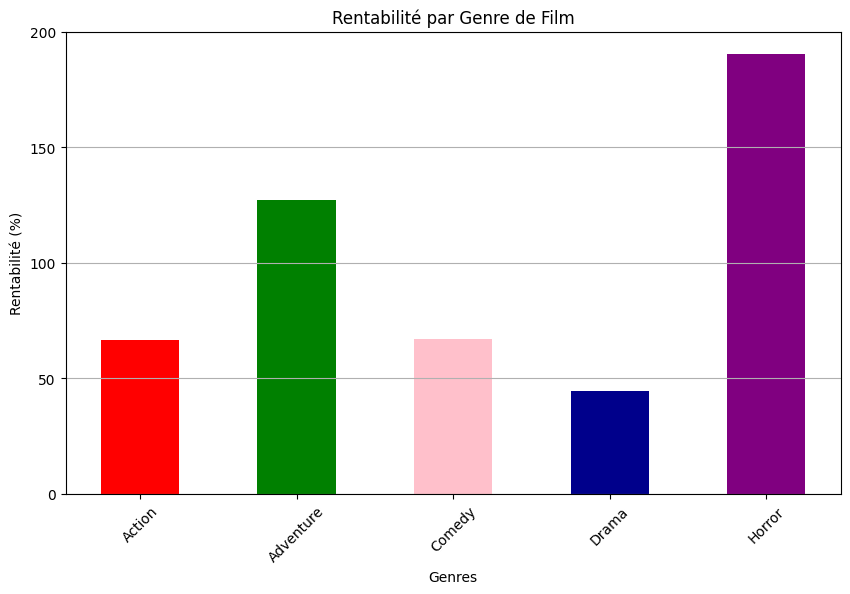

In [8]:
genres = data['genre']
renta_values = data['renta']
couleurs = ['red', 'green', 'pink', 'darkBlue', 'purple']
plt.figure(figsize=(10,6))
plt.bar(height=renta_values, x=genres, color=couleurs, width=0.5)

plt.xlabel('Genres')
plt.ylabel('Rentabilité (%)')
plt.title('Rentabilité par Genre de Film')
plt.ylim(0,200)
plt.grid(axis='y')
plt.yticks([0, 50, 100, 150, 200])


plt.xticks(rotation=45)

plt.show()
